In [2]:
# dataset source:   https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  LOAD LIBRARY & DATASET
</div>


In [139]:
import pandas as pd
# import charde
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [140]:
# with open("../datasets/cars.csv", 'rb') as f:
#     result = chardet.detect(f.read())
# print(result)
# data = pd.read_csv("../datasets/cars.csv", encoding=result['encoding'])

data = pd.read_csv("../datasets/cars.csv")

In [141]:
# data.head()

In [5]:
data.shape



(762091, 20)

In [80]:
# from IPython.display import display

# def unique_columns(data):
#     """
#     Display a table showing the number of unique values for each column in the DataFrame.
#     """
#     unique_counts = {
#         "Column": data.columns,
#         "Unique Values": [data[col].nunique() for col in data.columns]
#     }
    
#     result_df = pd.DataFrame(unique_counts)
#     display(result_df)
# unique_columns(data)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [82]:
data.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Cleaning 
</div>

In [83]:
# data.drop_duplicates()


In [84]:
# from IPython.display import display

# def unique_columns(data):
#     """
#     Display a table showing the number of unique values for each column in the DataFrame.
#     """
#     unique_counts = {
#         "Column": data.columns,
#         "Null Values": [data[col].isnull().sum() for col in data.columns]
#     }
    
#     result_df = pd.DataFrame(unique_counts)
#     display(result_df)
# unique_columns(data)

In [85]:
# Define a mapping dictionary
engine_mapping = {
    # Front-wheel Drive variations
    'Front-wheel Drive': 'FWD',
    'Front-Wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'Front-Wheel Drive with Limited-Slip Differential': 'FWD',

    # Rear-wheel Drive variations
    'Rear-wheel Drive': 'RWD',
    'Rear-Wheel Drive': 'RWD',
    'Rear Wheel Drive': 'RWD',
    'Rear-Wheel Drive with Limited-Slip Differential': 'RWD',

    # All-wheel Drive variations
    'All-wheel Drive': 'AWD',
    'All-Wheel Drive': 'AWD',
    'All Wheel Drive': 'AWD',
    'All-Wheel Drive with Locking and Limited-Slip Differential': 'AWD',
    'All-Wheel Drive with Locking Differential': 'AWD',

    # Four-wheel Drive (4WD / 4x4) variations
    'Four-wheel Drive': '4WD',
    'Four-Wheel Drive': '4WD',
    'Four Wheel Drive': '4WD',
    'Four-Wheel Drive with Locking and Limited-Slip Differential': '4WD',
    'Four-Wheel Drive with Locking Differential': '4WD',
    '4WD': '4WD',
    '4x4': '4WD',
    '4X4': '4WD',
    '4x2': '2WD',
    '2WD': '2WD',

    # Already short forms — map to themselves (optional but safe)
    'FWD': 'FWD',
    'RWD': 'RWD',
    'AWD': 'AWD',

    # Optional cleanup
    'Unknown': 'Unknown',
    float('nan'): 'Unknown' 
}
data['drivetrain'] = data['drivetrain'].map(engine_mapping)

In [86]:
data['drivetrain'].unique()

array(['FWD', 'Unknown', 'AWD', 'RWD', '4WD', nan, '2WD'], dtype=object)

In [152]:
data = data.drop(columns=['exterior_color','interior_color','seller_name'],axis =1)

KeyError: "['exterior_color', 'interior_color', 'seller_name'] not found in axis"

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Analysis
</div>

In [153]:
# from IPython.display import display

# def unique_columns(data):
#     """
#     Display a table showing the number of unique values for each column in the DataFrame.
#     """
#     unique_counts = {
#         "Column": data.columns,
#         "Unique Values": [data[col].nunique() for col in data.columns]
#     }
    
    
#     result_df = pd.DataFrame(unique_counts)
#     display(result_df)
unique_columns(data)

,Column,Unique Values
0,manufacturer,30
1,model,12187
2,year,100
3,mileage,158751
4,engine,6903
5,transmission,1313
6,drivetrain,6
7,fuel_type,36
8,mpg,865
9,accidents_or_damage,2


In [154]:
# avg_resell_price_by_brand = data.groupby('manufacturer')['price'].mean().sort_values(ascending = False)
# avg_resell_price_by_brand

In [155]:
# # data['price_drop_pct'] = (data['price_drop'] / (data['price'] + data['price_drop'])) * 100
# avg_price_drop = data.groupby('manufacturer')['price_drop'].mean().sort_values(ascending = False)
# avg_price_drop

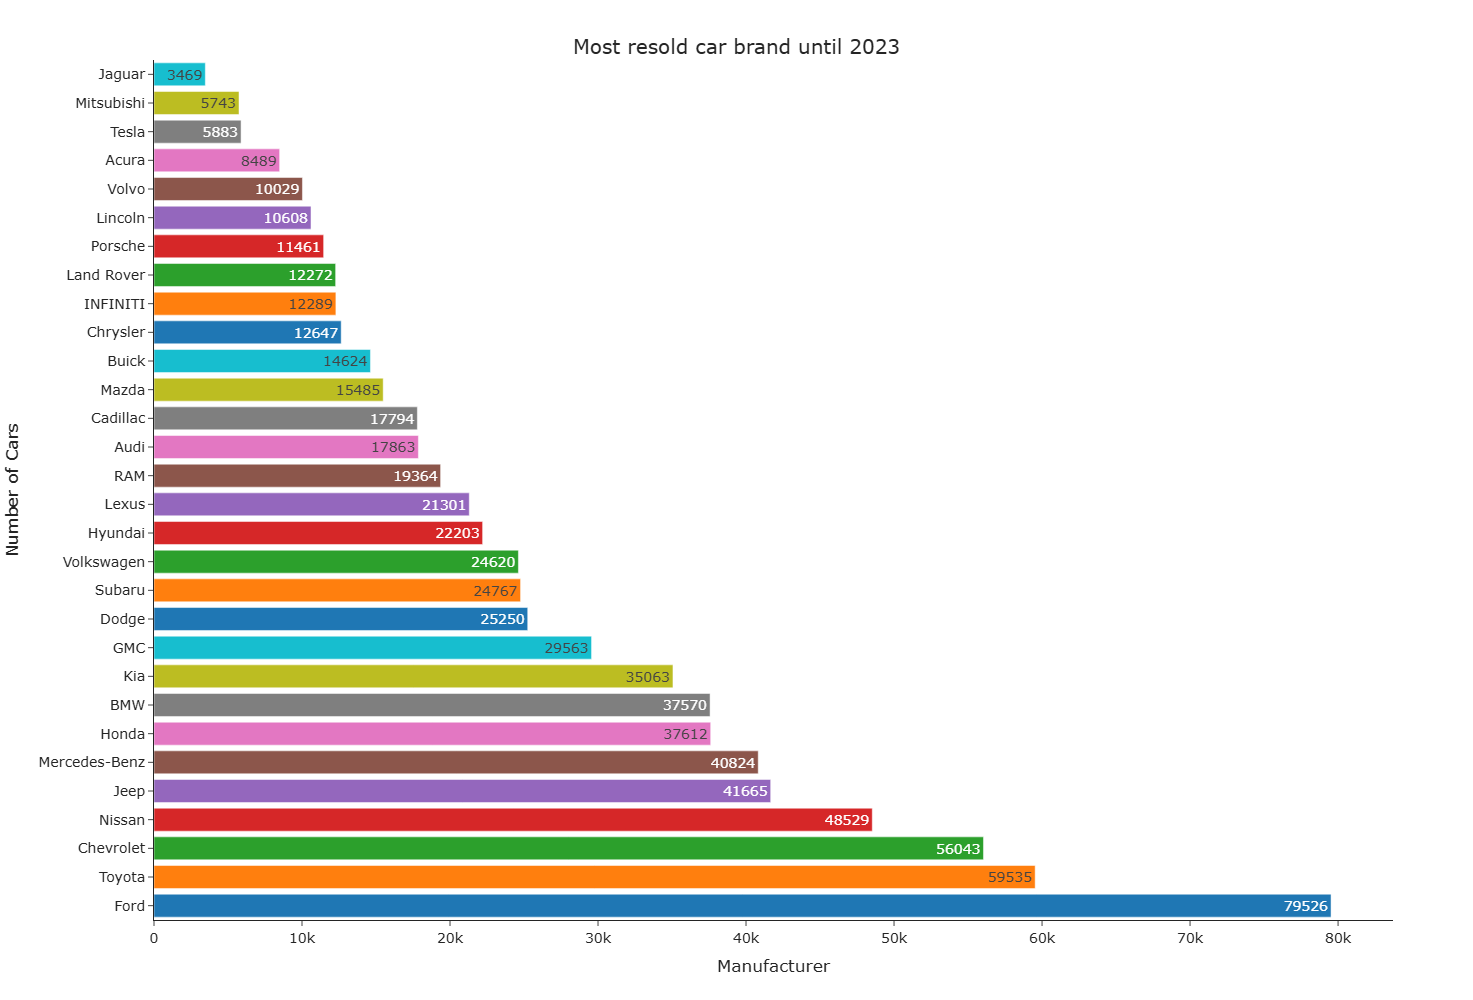

In [156]:
fig = px.bar(y = data['manufacturer'].value_counts().index, x = data['manufacturer'].value_counts(),
             color = data['manufacturer'].value_counts().index,
             # orintation='h',
              template = 'simple_white',text = data['manufacturer'].value_counts())


fig.update_layout(
    xaxis_title="Manufacturer",
    yaxis_title="Number of Cars",
    showlegend = False,
    height=1000,
    width=1400
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Most resold car brand until 2023",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

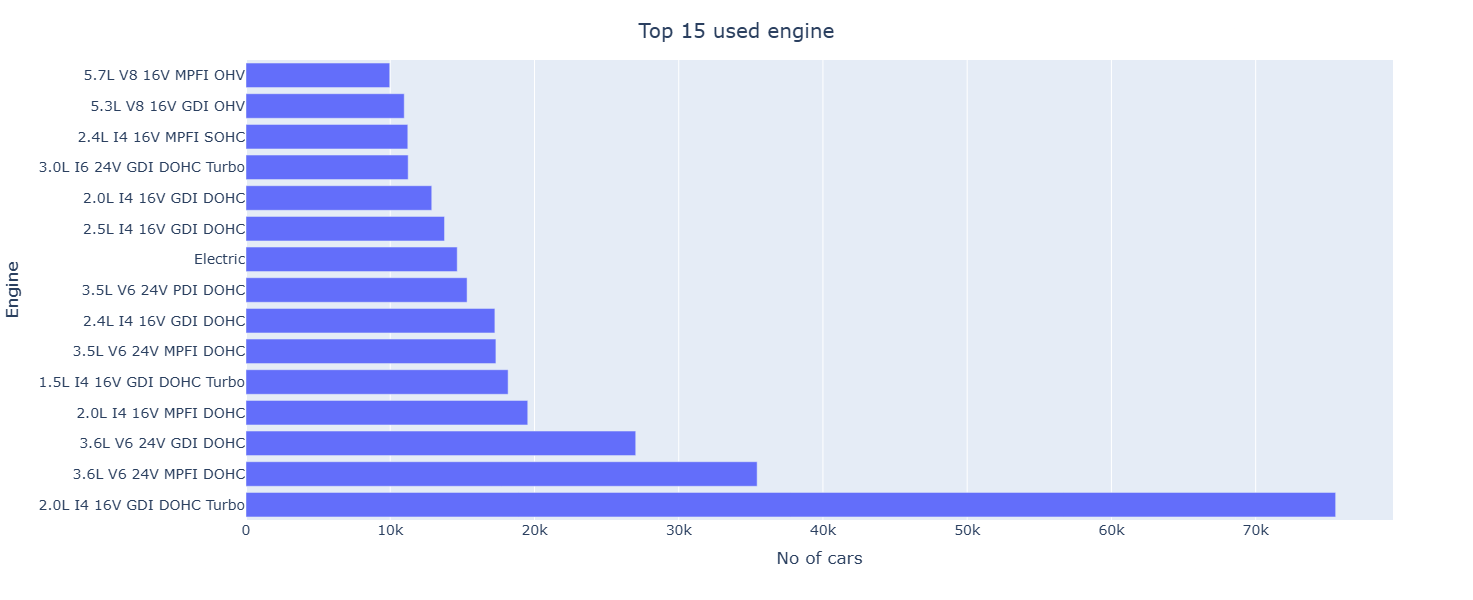

In [157]:
most_used_engin = data['engine'].value_counts().head(15)

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h',
)

fig.update_layout(
    yaxis_title="Engine",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Top 15 engine used",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()


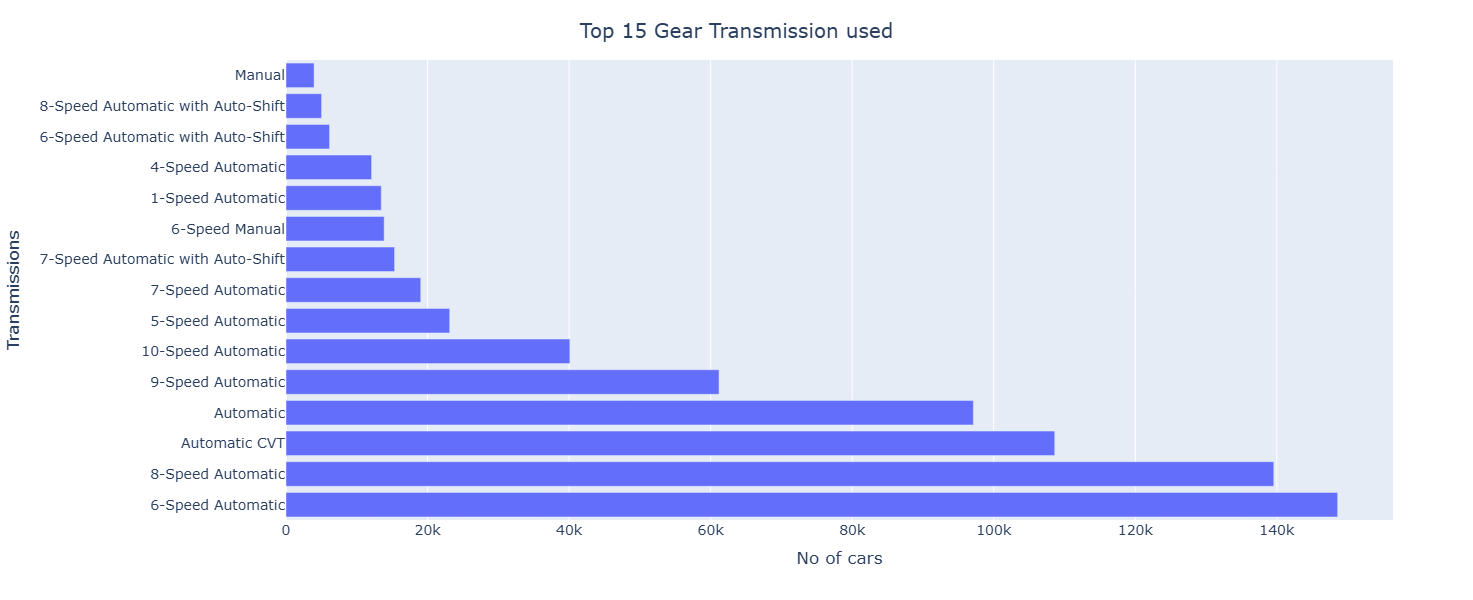

In [196]:
most_used_engin = data['transmission'].value_counts().head(15)

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_layout(
    yaxis_title="Transmissions",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Top 15 Gear Transmission used",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

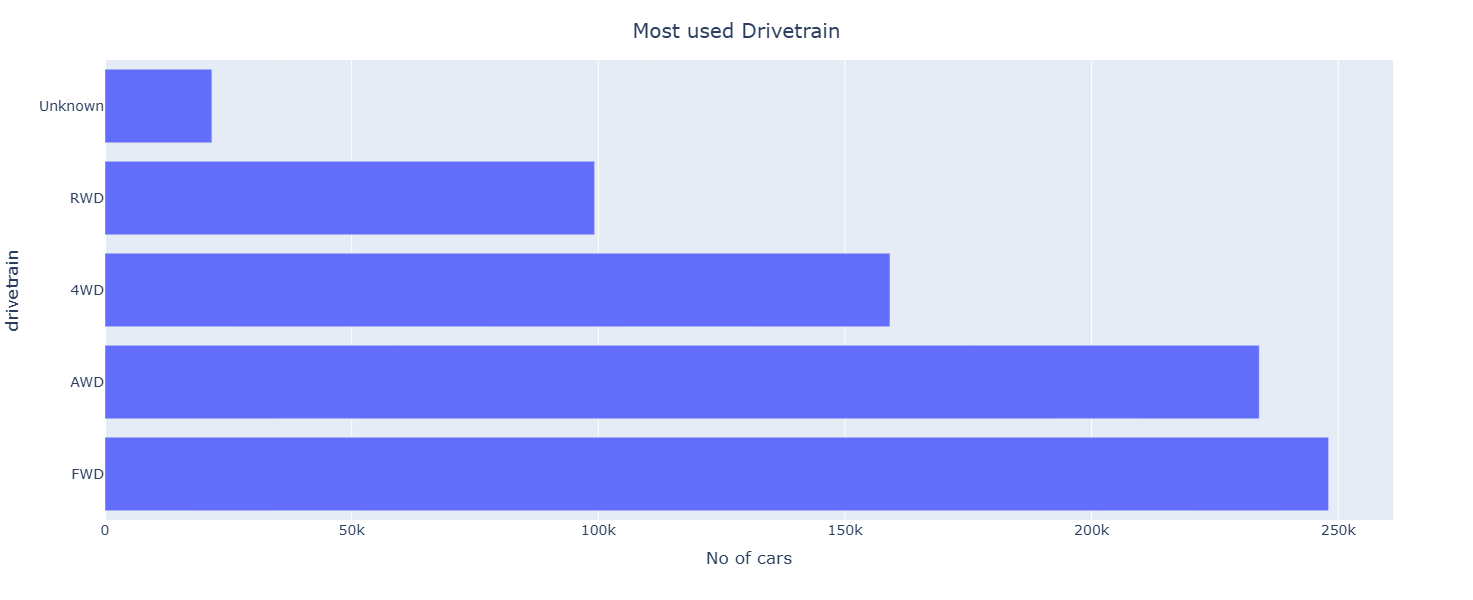

In [159]:
most_used_engin = data['drivetrain'].value_counts().head(5)

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_layout(
    yaxis_title="drivetrain",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Most used Drivetrain",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

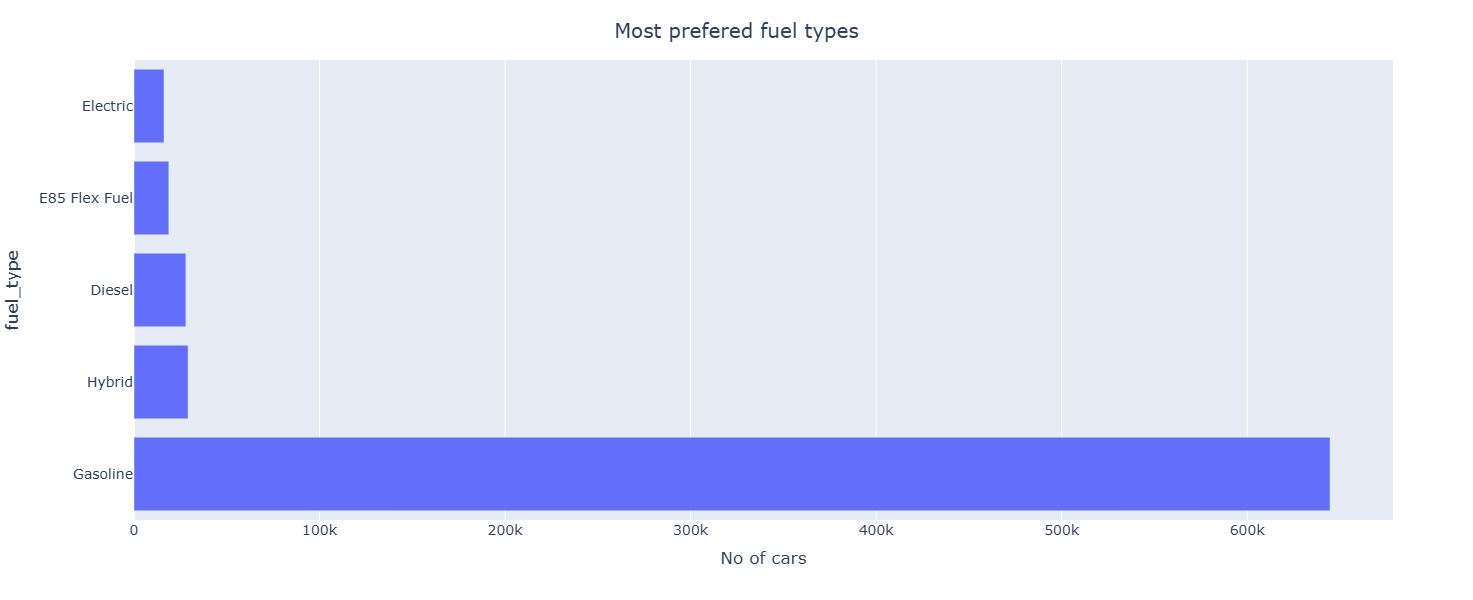

In [160]:
most_used_engin = data['fuel_type'].value_counts().head(5)

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_layout(
    yaxis_title="fuel_type",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Most prefered fuel types",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

In [161]:
data.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,FWD,Gasoline,39-38,0.0,0.0,0.0,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,FWD,Hybrid,39-38,1.0,1.0,1.0,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,FWD,Hybrid,39-38,0.0,1.0,1.0,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,FWD,Hybrid,39-38,0.0,1.0,1.0,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,FWD,Hybrid,39-38,1.0,0.0,1.0,3.7,4.4,12.0,300.0,14498.0


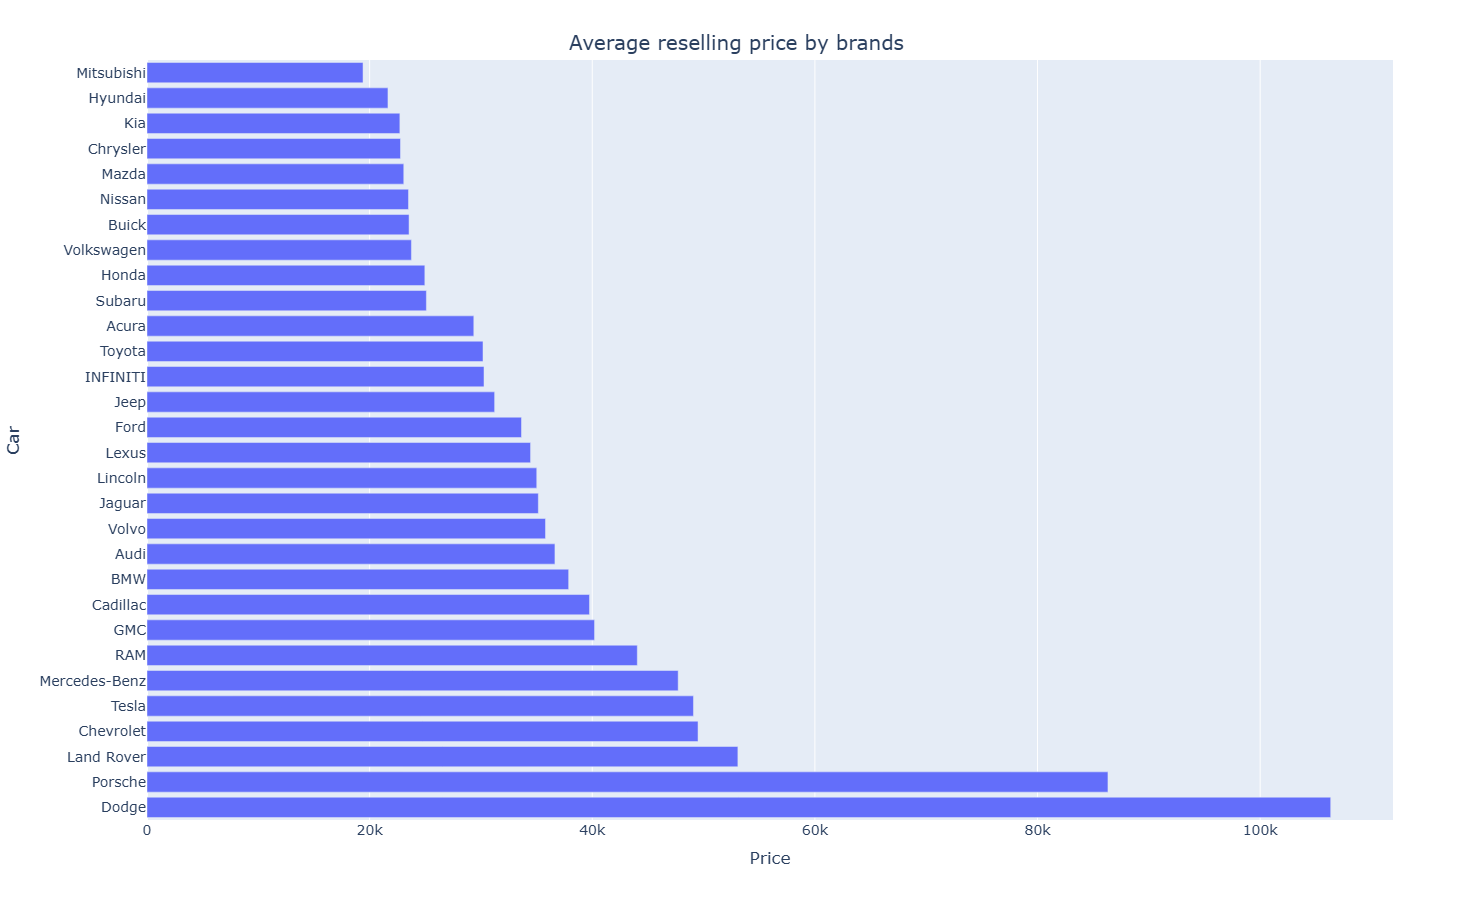

In [195]:
top_brand = data.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

fig = px.bar(
    x=top_brand.values,       
    y=top_brand.index,
    orientation='h')

fig.update_layout(
    yaxis_title="Car",
    xaxis_title="Price",
    showlegend = False,
    height=900,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Average reselling price by brands",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

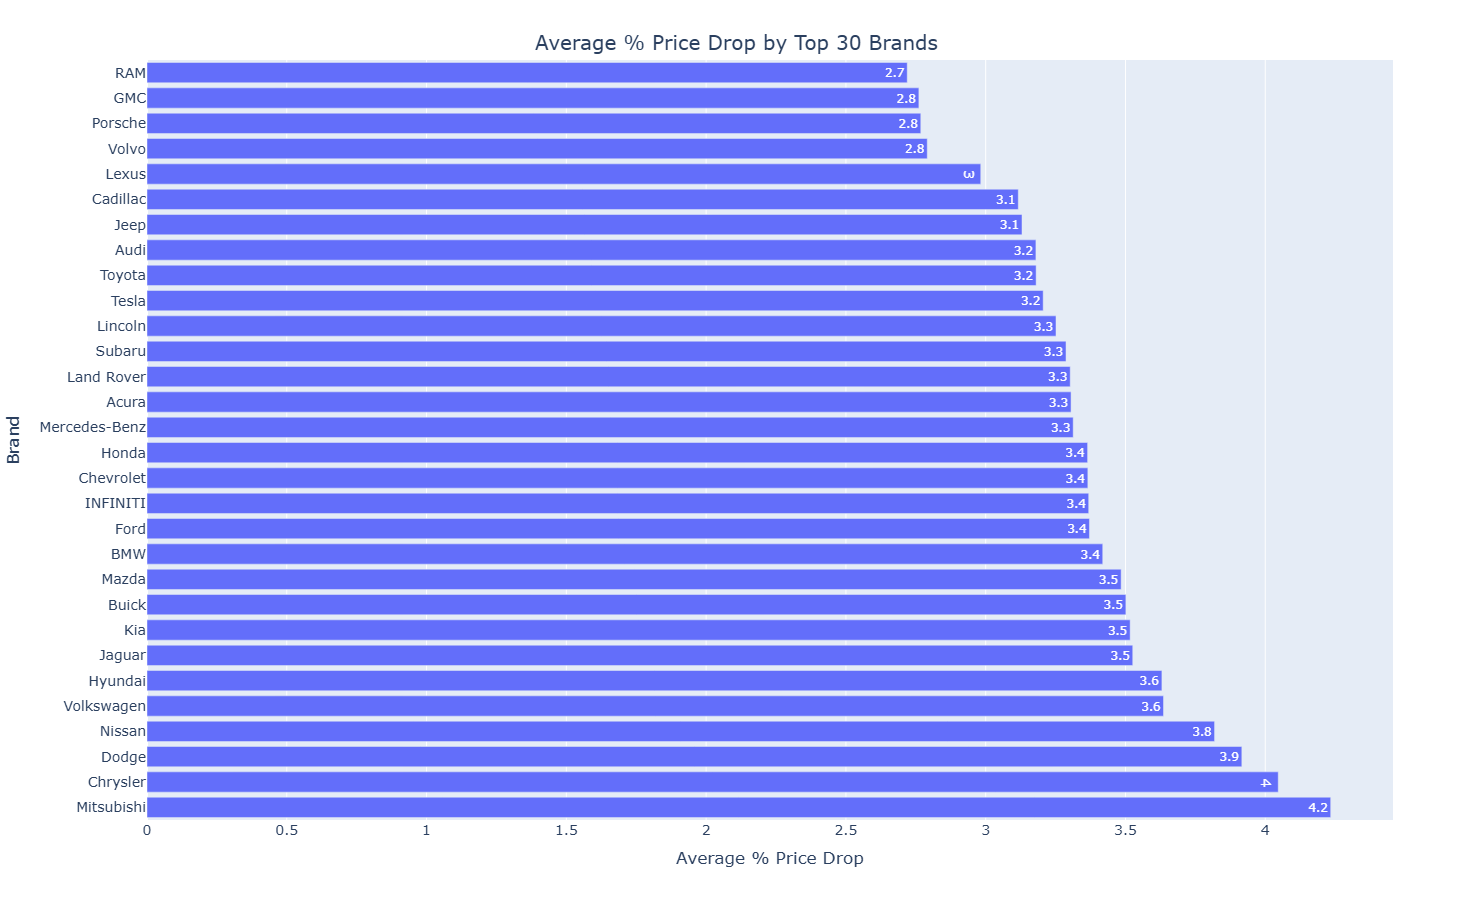

In [40]:
data['price_drop_pct'] = (data['price_drop'] / (data['price'] + data['price_drop'])) * 100

avg_price_drop_by_brand = data.groupby('manufacturer')['price_drop_pct'].mean().sort_values(ascending=False).head(30)

fig = px.bar(
    x=avg_price_drop_by_brand.values,
    y=avg_price_drop_by_brand.index,
    orientation='h',
    text = avg_price_drop_by_brand.values.round(1)
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % Price Drop",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % Price Drop by Top 30 Brands",
        'y': 0.96,
        'x': 0.5
    }
)
fig.show()

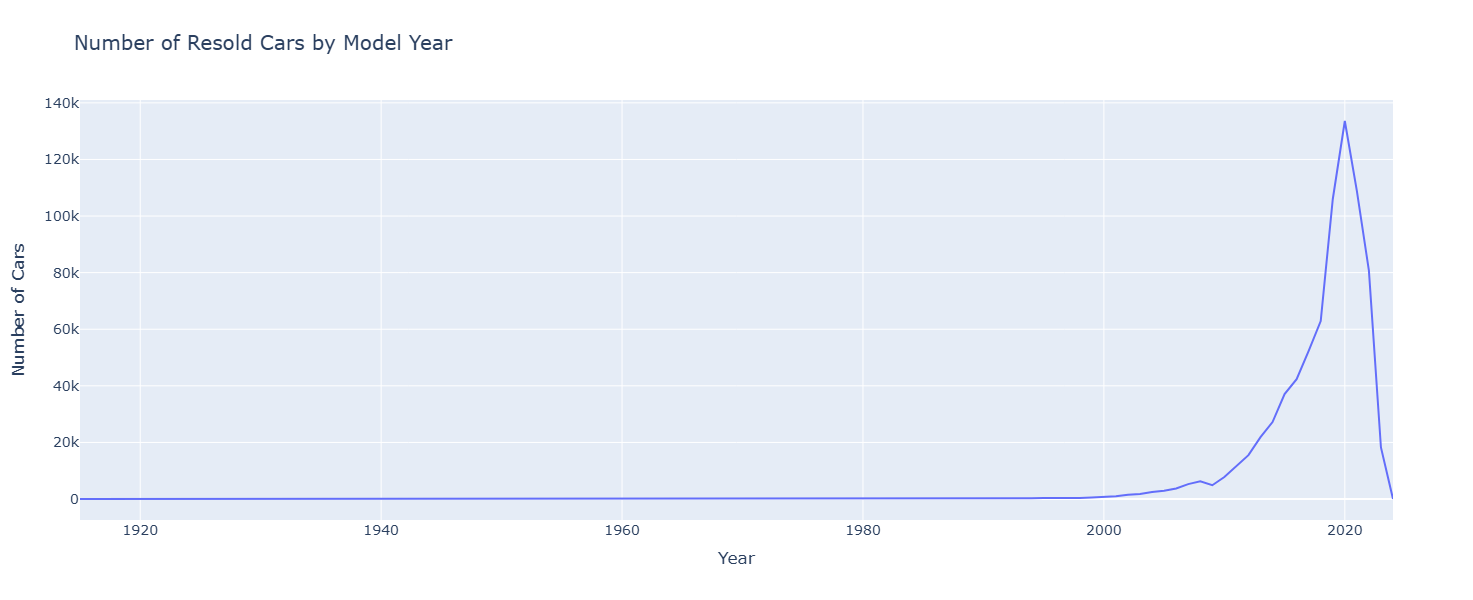

In [64]:
cars_per_year = data['year'].value_counts().sort_index()

import plotly.express as px

fig = px.line(
    x=cars_per_year.index,
    y=cars_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Cars'},
    title='Number of Resold Cars by Model Year'
)

fig.update_layout(
    height=600,
    width=1200,
    font=dict(size=14)
)

fig.show()


In [143]:
##### please comment out this code when you run from start-----------------

# def clean_mpg(val):
#     try:
#         if pd.isna(val):
#             return np.nan
            
#         parts = val.split('-')
#         low = float(parts[0])
#         high = float(parts[1])
        
#         if low == 0 and high == 0:
#             return np.nan
            
#         return (low + high) /2
        
#     except:
#         return np.nan

# data['mpg'] = data['mpg'].apply(clean_mpg)


In [144]:
data['mpg'].nunique()

156

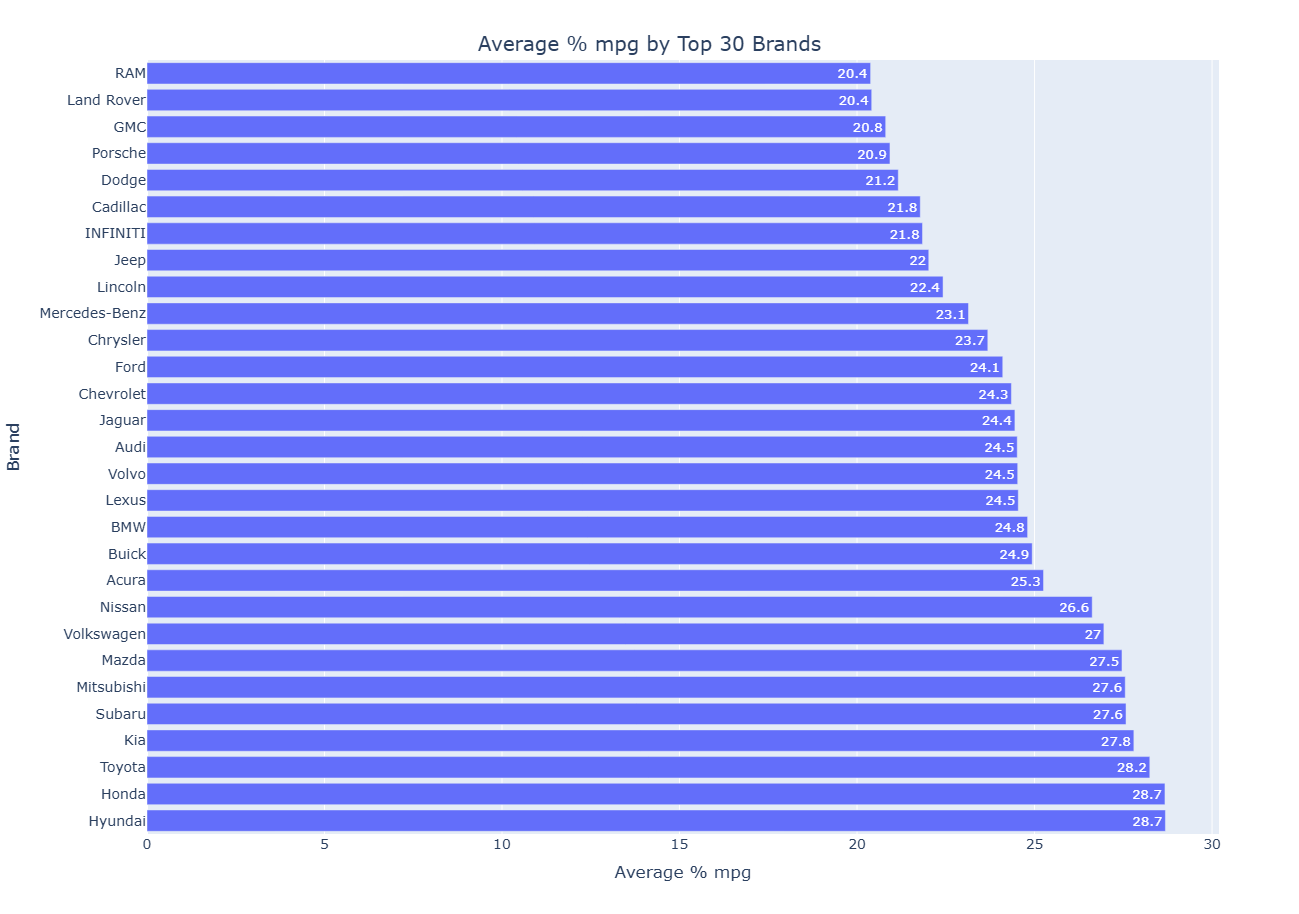

In [156]:

mpg_of_brand = data.groupby('manufacturer')['mpg'].mean().sort_values(ascending=False).head(29)

fig = px.bar(
    x=mpg_of_brand.values,
    y=mpg_of_brand.index,
    orientation='h',
    text = mpg_of_brand.values.round(1)
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % mpg",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % mpg by Top 30 Brands",
        'y': 0.96,
        'x': 0.5
    }
)
fig.show()

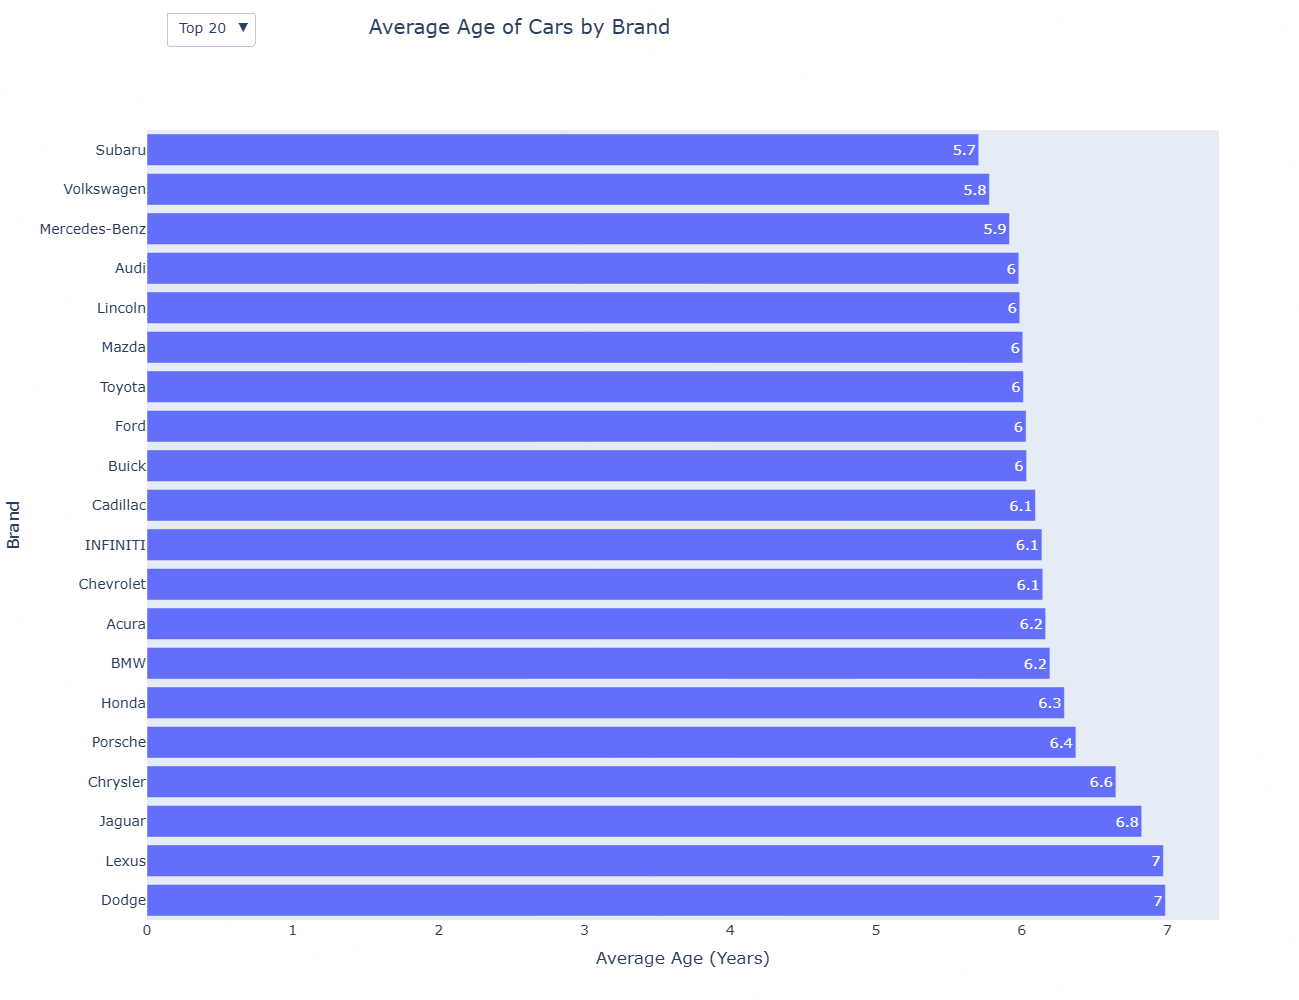

In [194]:
data['age'] = 2024 - data['year']

data_2000 = data[data['year'] > 2000]

avg_age_by_brand = data_2000.groupby('manufacturer')['age'].mean().sort_values(ascending=False)

top_options = [20, 15, 10, 30]
traces = []

for top_n in top_options:
    subset = avg_age_by_brand.head(top_n)
    trace = go.Bar(
        x=subset.values,
        y=subset.index,
        orientation='h',
        name=f'Top {top_n}',
        text=subset.values.round(1),
        textposition='auto',
        visible=(top_n == 20)  
    )
    traces.append(trace)

buttons = [
    dict(label=f'Top {n}',
         method='update',
         args=[{'visible': [i == idx for i in range(len(top_options))]},
               {'title': f'Average Age of Cars (Top {n} Brands)'}])
    for idx, n in enumerate(top_options)
]

fig = go.Figure(data=traces)

fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        direction="down",
        buttons=buttons,
        y=1.15,
        x=0.1,
        showactive=True
    )],
    yaxis_title="Brand",
    xaxis_title="Average Age (Years)",
    showlegend=False,
    height=1000,
    width=1200,
    font=dict(size=14),
    title={
        'text': "Average Age of Cars by Brand",
        'y': 0.98,
        'x': 0.4
    }
)
fig.show()

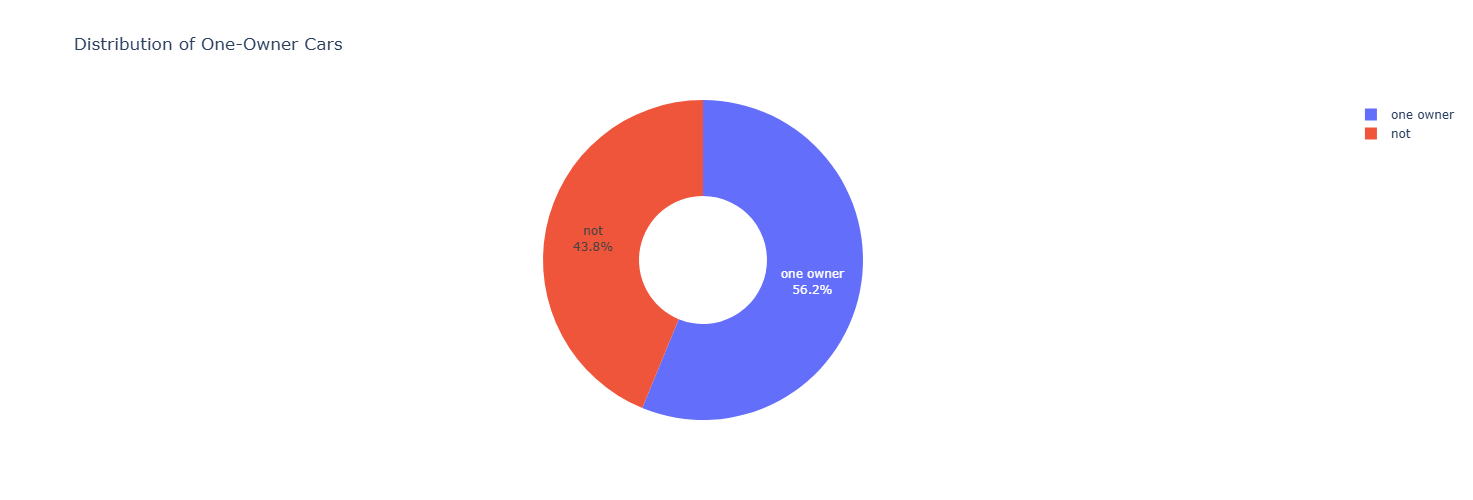

In [216]:
one_owner_ratio = data['one_owner'].value_counts(normalize=True)

label_names = ['one owner','not']

import plotly.express as px

fig = px.pie(
    names = label_names,
    values=one_owner_ratio.values,
    title='Distribution of One-Owner Cars',
    hole=0.4
)
fig.update_layout(
    height=500,
    width=500,
)
fig.update_traces(textinfo='percent+label')
fig.show()


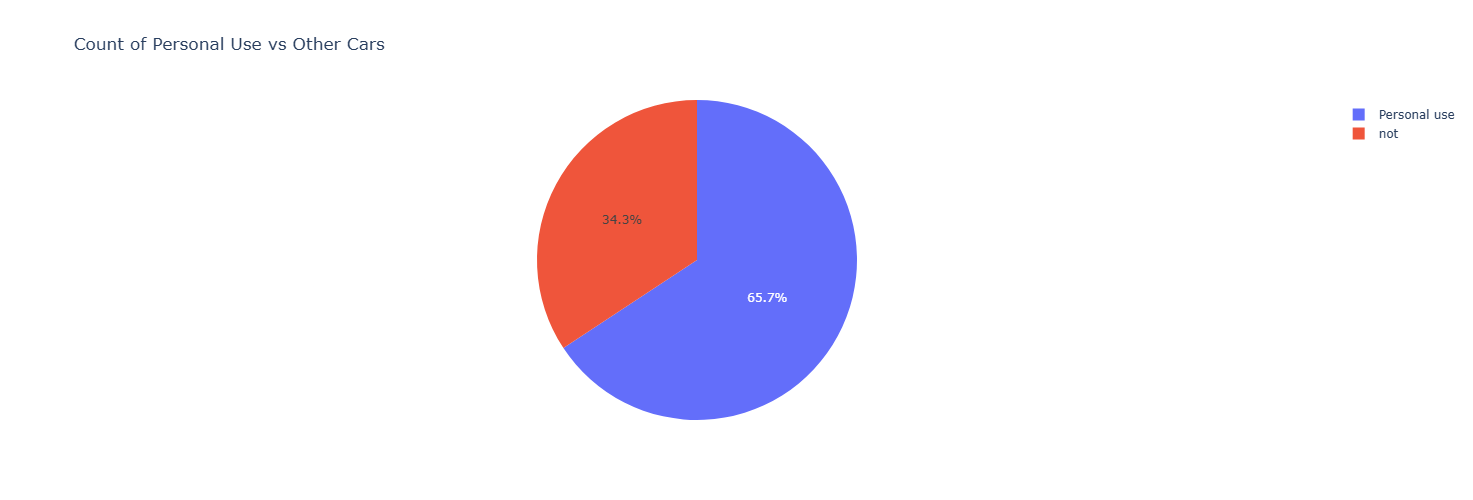

In [219]:
personal_use_ratio = data['personal_use_only'].value_counts(normalize=True)

label_names = ['Personal use','not']

fig = px.pie(
    names = label_names,
    values=personal_use_counts.values,
    title='Count of Personal Use vs Other Cars'
)
fig.update_layout(
    height = 500,
    width = 500,
)
fig.show()



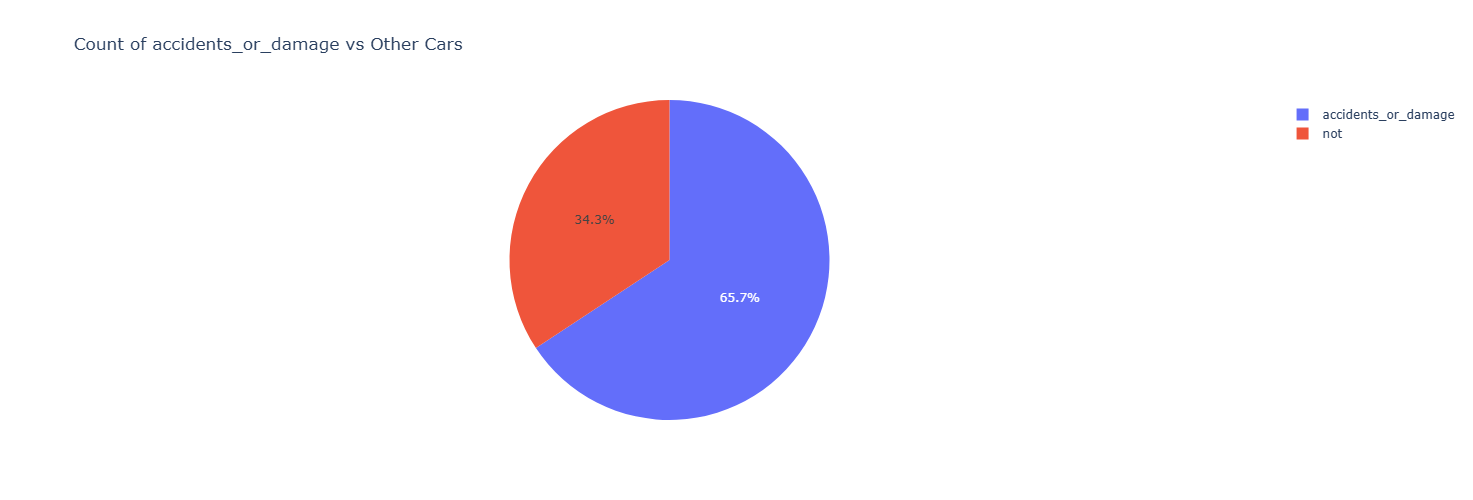

In [221]:
damage_ratio = data['accidents_or_damage'].value_counts(normalize=True)

label_names = ['accidents_or_damage','not']

fig = px.pie(
    names = label_names,
    values=personal_use_counts.values,
    title='Count of accidents_or_damage vs Other Cars'
)
fig.update_layout(
    height = 500,
    width = 500,
)
fig.show()

In [196]:
# top_30_brands = data['manufacturer'].value_counts().head(30).index
Dodge_data = data[data['manufacturer'] == 'Dodge']
Dodge_data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,model_2000,age
165030,Dodge,Aspen,1977,32115.0,V8,Automatic,NaN,NaN,NaN,RED,...,NaN,1.0,Gateway Classic Cars,NaN,NaN,0.0,NaN,27000.0,False,47
165031,Dodge,Caravan SE,1997,201611.0,3.0L V6 12V MPFI SOHC,Automatic,Front-wheel Drive,Gasoline,21.5,Forest Green Pearlcoat,...,0.0,0.0,East Coast Auto Source,1.8,4.8,2.0,NaN,695.0,False,27
165032,Dodge,Caravan SXT,2006,47280.0,3.3L V6 12V MPFI OHV,4-Speed Automatic,Front-wheel Drive,Gasoline,22.5,Red,...,1.0,1.0,EZ Motorcars,NaN,4.3,28.0,NaN,9977.0,True,18
165033,Dodge,Caravan Cargo,2005,192458.0,3.3L V6 12V MPFI OHV,4-Speed Automatic,Front-wheel Drive,Gasoline,22.5,White,...,0.0,0.0,Turnpike Motors,NaN,3.8,25.0,NaN,2595.0,True,19
165034,Dodge,Caravan SE,2005,218453.0,3.3L V6 12V MPFI OHV,4-Speed Automatic,Front-wheel Drive,Gasoline,23.0,White,...,0.0,0.0,APX Auto Brokers,3.2,3.8,25.0,NaN,1991.0,True,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190275,Dodge,Durango GT Plus,2019,99536.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,21.5,Billet Clearcoat Metallic,...,0.0,0.0,Premier Chevrolet Buick GMC,NaN,4.7,61.0,NaN,23923.0,True,5
190276,Dodge,Durango R/T,2021,12519.0,5.7L V8 16V MPFI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,18.0,White,...,1.0,1.0,Beach Auto,NaN,4.7,28.0,NaN,46995.0,True,3
190277,Dodge,Durango Limited,2015,65179.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,NaN,20.5,Granite Crystal Clearcoat Metallic,...,0.0,1.0,Auto Haus on Velp,4.9,4.7,104.0,NaN,22500.0,True,9
190278,Dodge,Durango SXT,2015,103136.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Rear-wheel Drive,NaN,21.5,Maximum Steel Metallic,...,0.0,1.0,Off Lease Only Bradenton,4.8,4.7,104.0,NaN,16499.0,True,9


In [204]:
Dodge_data['model'].


437

In [154]:
tesla_data = data[data['manufacturer'] == 'Tesla']
tesla_data.count()

manufacturer           5883
model                  5883
year                   5883
mileage                5883
engine                 5847
transmission           5883
drivetrain             5874
fuel_type              5873
mpg                       0
exterior_color         5712
interior_color         5105
accidents_or_damage    5359
one_owner              5347
personal_use_only      5359
seller_name            5526
seller_rating          4206
driver_rating          5517
driver_reviews_num     5883
price_drop             3463
price                  5883
dtype: int64

In [155]:
tesla_data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
662024,Tesla,Model S 70D,2016,73310.0,Electric,1-Speed Automatic,All-wheel Drive,Electric,NaN,Gray,NaN,0.0,0.0,0.0,CarVision of Maple Shade,4.7,4.9,40.0,2000.0,30999.0
662025,Tesla,Model S Long Range,2020,42455.0,Electric,1-Speed Automatic,All-wheel Drive,Electric,NaN,Gray,White,0.0,1.0,1.0,Used Imports Auto,NaN,4.2,5.0,NaN,60220.0
662026,Tesla,Model S 75,2016,73979.0,Electric,1-Speed Automatic,Rear-wheel Drive,Electric,NaN,Black,Tan,0.0,1.0,1.0,DFW Unique Auto,NaN,4.9,40.0,NaN,30888.0
662027,Tesla,Model S 75D,2018,45027.0,Electric,1-Speed Automatic,All-wheel Drive,Electric,NaN,Obsidian Black Metallic,White,0.0,0.0,1.0,Auto Hub,4.3,4.8,14.0,1000.0,40890.0
662028,Tesla,Model S 85D,2015,63474.0,Electric,1-Speed Automatic,All-wheel Drive,Electric,NaN,Gray Metallic,Tan,1.0,1.0,1.0,Auto's of Chicago,4.2,4.8,55.0,1000.0,35570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667902,Tesla,Model X Plaid,2022,987.0,Electric,1-Speed Automatic,All-wheel Drive,Electric,NaN,Red Multi,Black,0.0,1.0,1.0,HGreg.com Lux,4.7,NaN,0.0,4000.0,118000.0
667903,Tesla,Model X 75D,2017,44118.0,Electric,1-Speed Automatic,All-wheel Drive,Electric,NaN,Obsidian Black,Black,0.0,0.0,0.0,iDrive1 Motorcars,NaN,4.7,27.0,NaN,50977.0
667904,Tesla,Roadster,2010,16701.0,Electric,1-Speed Automatic,Rear-wheel Drive,Electric,NaN,Obsidian Black Metallic,Beige,0.0,0.0,1.0,Dillon's Auto Supercenter,2.6,4.6,5.0,NaN,149900.0
667905,Tesla,Roadster 2.5 Sport,2011,19803.0,288.0HP Electric Motor Electric Fuel System,A/T,Rear-wheel Drive,Electric,NaN,Red,Brown,NaN,NaN,NaN,NaN,NaN,4.2,6.0,NaN,139000.0
